<a href="https://colab.research.google.com/github/ruygonzalez/Visual_Investing/blob/master/Creating_visual_representations_of_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import packages
import numpy as np
import pandas as pd
import math

Here we download the data for each stock from April 4 2019 to April 4 2020 from Yahoo Finance. We then process it to aggregate the data into one dataframe. To speed things up, we've saved this aggregate dataframe and download that instead

In [0]:
!wget --quiet -O all_stock_data.csv https://caltech.box.com/shared/static/dhg488dhv04474cungdg32i94l50le2s.csv

So we don't need to run the !wget lines below if we run the line above

In [0]:
!wget --quiet -O levi.csv https://caltech.box.com/shared/static/rhma8qbvyzf6aicgqm2va3dbk0qiu46q.csv
!wget --quiet -O tjx.csv https://caltech.box.com/shared/static/45o4yh0um5kq55qkdjt7y0dh9ijuo0d3.csv
!wget --quiet -O cvs.csv https://caltech.box.com/shared/static/fogmmpcokeo3u88s5mtal29gg6uffg6m.csv
!wget --quiet -O ccl.csv https://caltech.box.com/shared/static/kvtczzxrwgf6agvpvvxko8jdw7cxw4zn.csv
!wget --quiet -O mmm.csv https://caltech.box.com/shared/static/nqt4jr7mqj46zs505x4h6va6xmykchzi.csv
!wget --quiet -O jnj.csv https://caltech.box.com/shared/static/c8a44zj2jcur80yjw0vkxl41lmq9lwrj.csv
!wget --quiet -O bynd.csv https://caltech.box.com/shared/static/c87kigvbtsl3ybvb6ux6vf7tkrh3dwgz.csv
!wget --quiet -O rcl.csv https://caltech.box.com/shared/static/euep0udvk894onv1xt4tj9v3f4xu22ma.csv
!wget --quiet -O nclh.csv https://caltech.box.com/shared/static/y62bcpw45oqxm5a95sgjdct84aro60vm.csv
!wget --quiet -O f.csv https://caltech.box.com/shared/static/p3qhcef5d3z2taom8oeq2jh6baokts7y.csv
!wget --quiet -O nke.csv https://caltech.box.com/shared/static/1gvgu58rdyobr0kkfy9bgyxzxh7jwr2a.csv
!wget --quiet -O dis.csv https://caltech.box.com/shared/static/6isc9g97druf8mt4oufqpwpifa4n7ikz.csv
!wget --quiet -O x.csv https://caltech.box.com/shared/static/vwwqqdp3sr9hg4dr85uo528p44qx02pt.csv
!wget --quiet -O gm.csv https://caltech.box.com/shared/static/d4n8tepifusozhupzbanhevr7ji5w80u.csv
!wget --quiet -O gme.csv https://caltech.box.com/shared/static/npbpj3p4a6a0ttjn4pbkymndwie8l62c.csv
!wget --quiet -O mcd.csv https://caltech.box.com/shared/static/5rj9rsapp75fbfieaygyit3hmel48ygp.csv
!wget --quiet -O pep.csv https://caltech.box.com/shared/static/rpsj2fd7i6fkmmnsor2fot43qffhh8bn.csv
!wget --quiet -O vwagy.csv https://caltech.box.com/shared/static/xxphodd7wlcsgz7n253ppw4zwfuka3vj.csv
!wget --quiet -O ua.csv https://caltech.box.com/shared/static/wp7nfvxdbc2zy7vuenuvqjli5wb5gx4d.csv
!wget --quiet -O twtr.csv https://caltech.box.com/shared/static/q3b3e26nfi5u6xi3048v8xf9ff492ivk.csv
!wget --quiet -O baba.csv https://caltech.box.com/shared/static/mburckrpwes8p2aeceadp4bb3jt5yh8w.csv
!wget --quiet -O nflx.csv https://caltech.box.com/shared/static/rsqa9o314rmxvlft6evq37r9k5nxr3pq.csv
!wget --quiet -O hbi.csv https://caltech.box.com/shared/static/hxq0f1gpdot572sdxxygbuh694bq7xl8.csv
!wget --quiet -O pvh.csv https://caltech.box.com/shared/static/c5g1fsbj0lput5iydbts7diclr8b4hdo.csv
!wget --quiet -O bbby.csv https://caltech.box.com/shared/static/hqqqxp4sqr5lwpqwvmhtf65qcvaqia3a.csv

In [0]:
!wget --quiet -O jcp.csv https://caltech.box.com/shared/static/o84tgjx3l7qqvj9dzyh25roahblfv7u4.csv
!wget --quiet -O cost.csv https://caltech.box.com/shared/static/n3kglh2o5tz86oaizbygosfy88ooenhk.csv
!wget --quiet -O kss.csv https://caltech.box.com/shared/static/vet8zly3m2jpyamb5isqgb7pma39yab9.csv
!wget --quiet -O m.csv https://caltech.box.com/shared/static/9qdvv5m8q0nwptedchyf53v30ahg41u2.csv
!wget --quiet -O wmt.csv https://caltech.box.com/shared/static/lbl8zjyx2trzf4z0yzr4ry4r4tn341sq.csv
!wget --quiet -O rad.csv https://caltech.box.com/shared/static/pm4hg4sdszr9ua2iqem1zbn1vqlfi7ud.csv
!wget --quiet -O wba.csv https://caltech.box.com/shared/static/9mdcjqlfy6qvk83mfbc9xzu1nbrg53x5.csv
!wget --quiet -O ba.csv https://caltech.box.com/shared/static/6w3oxabdyt0rmr0xxde0rivjiwb36si5.csv
!wget --quiet -O ge.csv https://caltech.box.com/shared/static/15m1aeu4e18zvhyucyprysqkqkh0zrtw.csv
!wget --quiet -O gps.csv https://caltech.box.com/shared/static/sgn69m42wqcq50ro376jaq14atgb28v1.csv
!wget --quiet -O gis.csv https://caltech.box.com/shared/static/158j3h0gmmet3dc387w2ygbbp5bkhutq.csv
!wget --quiet -O yum.csv https://caltech.box.com/shared/static/lrx53tbr2mecyt7dlimb1g4b8pitr6x8.csv
!wget --quiet -O aal.csv https://caltech.box.com/shared/static/ti4qsgrmju0ld6opd08aqa8upskm4uxb.csv
!wget --quiet -O luv.csv https://caltech.box.com/shared/static/ves97bno7w42i5py25jfvq7ai8nm2abu.csv
!wget --quiet -O jblu.csv https://caltech.box.com/shared/static/1ym4oqifbyv0anwhra8q9ov8n0a4rspt.csv
!wget --quiet -O dal.csv https://caltech.box.com/shared/static/ipqb5mnr2muy2dk16ke88xlv4oe41tsi.csv
!wget --quiet -O ual.csv https://caltech.box.com/shared/static/o5xtnz8pf4hlmtoglpbb1r6k6yqbscih.csv
!wget --quiet -O tsla.csv https://caltech.box.com/shared/static/hdosbai9ojqxzpzpc2iew3bsbsci05at.csv
!wget --quiet -O hmc.csv https://caltech.box.com/shared/static/aayrxgpv5o9wwrt5k0yrvkav4lvwczox.csv
!wget --quiet -O tm.csv https://caltech.box.com/shared/static/jmy43wqe5e2cufu2j2n3eokryvrksafg.csv
!wget --quiet -O mgm.csv https://caltech.box.com/shared/static/g6ccigy70dzfr5n8c8hmnhx0kmvbcdhn.csv
!wget --quiet -O amc.csv https://caltech.box.com/shared/static/mr385ml74z0ja0s68fjvb4b8dhatfs07.csv
!wget --quiet -O lyv.csv https://caltech.box.com/shared/static/akn7agbwtbwedq99xykqznczvlarw7ui.csv
!wget --quiet -O seas.csv https://caltech.box.com/shared/static/2uzicas0dvs5agyg4saazl913jviyej2.csv
!wget --quiet -O six.csv https://caltech.box.com/shared/static/arnaawlkm3xgu96sr4jsten66v2uh3ot.csv
!wget --quiet -O imax.csv https://caltech.box.com/shared/static/sic38vxjweft3oxdrqsxcmwretfnt7s2.csv

In [0]:
!wget --quiet -O fb.csv https://caltech.box.com/shared/static/ld8nihsbqnscunvr46870yeo2683d8hc.csv
!wget --quiet -O goog.csv https://caltech.box.com/shared/static/tus8tlmtxup68gyrdrpmukeax4xw86i9.csv
!wget --quiet -O amzn.csv https://caltech.box.com/shared/static/31eq4ciwohqdw599bzhbzsrnum51sd0r.csv
!wget --quiet -O zm.csv https://caltech.box.com/shared/static/x9m1zmksm0o270u7j9fiszt3o55yfnrc.csv

In [0]:
def load_data():
    stocks = ['levi.csv', 'tjx.csv', 'cvs.csv', 'ccl.csv', 'mmm.csv', 'jnj.csv', 
              'bynd.csv', 'rcl.csv', 'nclh.csv', 'f.csv', 'nke.csv', 'dis.csv',
              'x.csv', 'gm.csv', 'gme.csv', 'mcd.csv', 'pep.csv', 'vwagy.csv',
              'ua.csv', 'twtr.csv', 'baba.csv', 'nflx.csv', 'hbi.csv', 
              'pvh.csv', 'bbby.csv', 'jcp.csv', 'kss.csv', 'm.csv',
              'wmt.csv', 'rad.csv', 'wba.csv', 'ba.csv', 'ge.csv',
              'gps.csv', 'gis.csv', 'yum.csv', 'aal.csv', 'luv.csv', 'jblu.csv', 
              'dal.csv', 'ual.csv', 'tsla.csv', 'hmc.csv', 'mgm.csv', 
              'amc.csv', 'lyv.csv', 'seas.csv', 'six.csv', 'imax.csv', 'fb.csv', 
              'goog.csv', 'amzn.csv', 'zm.csv']
    industries = {stocks[0] : 'clothing', stocks[1] : 'retail', stocks[2] : 'health',
                  stocks[3] : 'cruise', stocks[4] : 'manufacturing', stocks[5] :'health',
                  stocks[6] : 'food', stocks[7] : 'cruise', stocks[8] : 'cruise', 
                  stocks[9] : 'car', stocks[10] : 'clothing', stocks[11] : 'entertainment', 
                  stocks[12] : 'manufacturing2', stocks[13] : 'car', stocks[14] : 'entertainment', 
                  stocks[15] : 'food', stocks[16] : 'food', stocks[17] : 'car', 
                  stocks[18] : 'clothing', stocks[19] : 'technology', stocks[20] : 'technology', 
                  stocks[21] : 'technology2', stocks[22] : 'clothing', stocks[23] : 'clothing', 
                  stocks[24] : 'retail', stocks[25] : 'retail', stocks[26] : 'retail', 
                  stocks[27] : 'retail', stocks[28] : 'retail', 
                  stocks[29] : 'health', stocks[30] : 'health', stocks[31] : 'manufacturing', 
                  stocks[32] : 'manufacturing2', stocks[33] : 'clothing', 
                  stocks[34] : 'food', stocks[35] : 'food', stocks[36] : 'airline', stocks[37] : 'airline',
                  stocks[38] : 'airline', stocks[39] : 'airline', stocks[40] : 'airline', 
                  stocks[41] : 'technology2', stocks[42] : 'car', stocks[43] : 'entertainment',
                  stocks[44] : 'entertainment', stocks[45] : 'entertainment', stocks[46] : 'entertainment', 
                  stocks[47] : 'entertainment', stocks[48] : 'entertainment', 
                  stocks[49] : 'technology',  stocks[50] : 'technology3', 
                  stocks[51] : 'technology3',  stocks[52] : 'technology'}

    total_df = pd.DataFrame()
    for stock in stocks: 
        df = pd.read_csv(stock)
        industry = industries[stock]
        name = stock[:-4]
        closes = df['Close'].tolist()
        df['Day'] = [i for i in range(df.shape[0])]
        df['Industry'] = [industry for i in range(df.shape[0])]
        df['Name'] = [name for i in range(df.shape[0])]
        df['Close Difference'] = [(closes[i] - closes[i - 1]) if i > 0 \
                                  else 0 for i in range(df.shape[0])]
        df['Close Difference Percentage (Previous Day)'] = \
        [(closes[i] - closes[i - 1]) / closes[i - 1] * 100 if i > 0 \
         else 0 for i in range(df.shape[0])]
        total_df = total_df.append(df, ignore_index=True)
    
    return total_df

In [3]:
# the lines below are used to get and save a dataframe with the aggregate stock data
#total_df = load_data()
#total_df.to_csv('all_stock_data.csv', index=False)

# since we have already saved this, we can simply load it
total_df = pd.read_csv('all_stock_data.csv')
total_df.head()

Date  ...  Close Difference Percentage (Previous Day)
0  2019-04-04  ...                                    0.000000
1  2019-04-05  ...                                    0.000000
2  2019-04-08  ...                                   -1.798073
3  2019-04-09  ...                                    2.723005
4  2019-04-10  ...                                    3.976239

[5 rows x 12 columns]

In [0]:
# we use the following function to make an "index" for each industry
# that adds up the data for all the stocks in that industry
def get_industry_index(df):
    new_df = df.drop(columns=['Close Difference', 'Close Difference Percentage (Previous Day)'])
    new_df = new_df.groupby(['Industry', 'Date', 'Day']).sum().reset_index()

    final_df = pd.DataFrame()
    for industry in list(new_df['Industry'].unique()):
        ind_df = new_df[new_df['Industry'] == industry].copy()
        closes = ind_df['Close'].tolist()
        ind_df['Close Difference'] = [(closes[i] - closes[i - 1]) if i > 0 \
                                  else 0 for i in range(ind_df.shape[0])]
        ind_df['Close Difference Percentage (Previous Day)'] = \
        [(closes[i] - closes[i - 1]) / closes[i - 1] * 100 if i > 0 \
         else 0 for i in range(ind_df.shape[0])]
        final_df = final_df.append(ind_df, ignore_index = True)
    
    return final_df

In [5]:
total_index_df = get_industry_index(total_df)
total_index_df.head()

Industry  ... Close Difference Percentage (Previous Day)
0  airline  ...                                   0.000000
1  airline  ...                                   0.415362
2  airline  ...                                  -0.770511
3  airline  ...                                  -0.796927
4  airline  ...                                   1.318281

[5 rows x 11 columns]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dates = total_df['Date'].to_numpy()
days=[0, 50, 100, 150, 200, 250]
dates_tickers = dates[days]

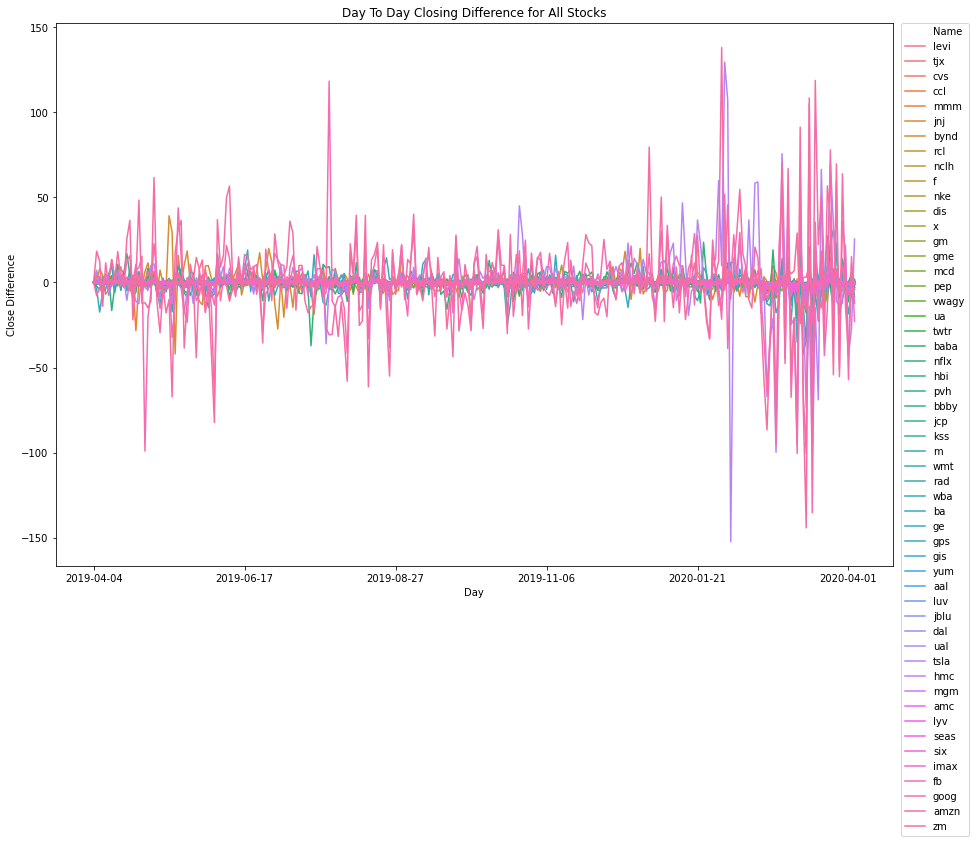

In [0]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='Day', y='Close Difference', hue='Name', data=total_df)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(ticks=days, labels=dates_tickers)
plt.title("Day To Day Closing Difference for All Stocks")
plt.savefig('all_stocks_difference.png')
plt.show()

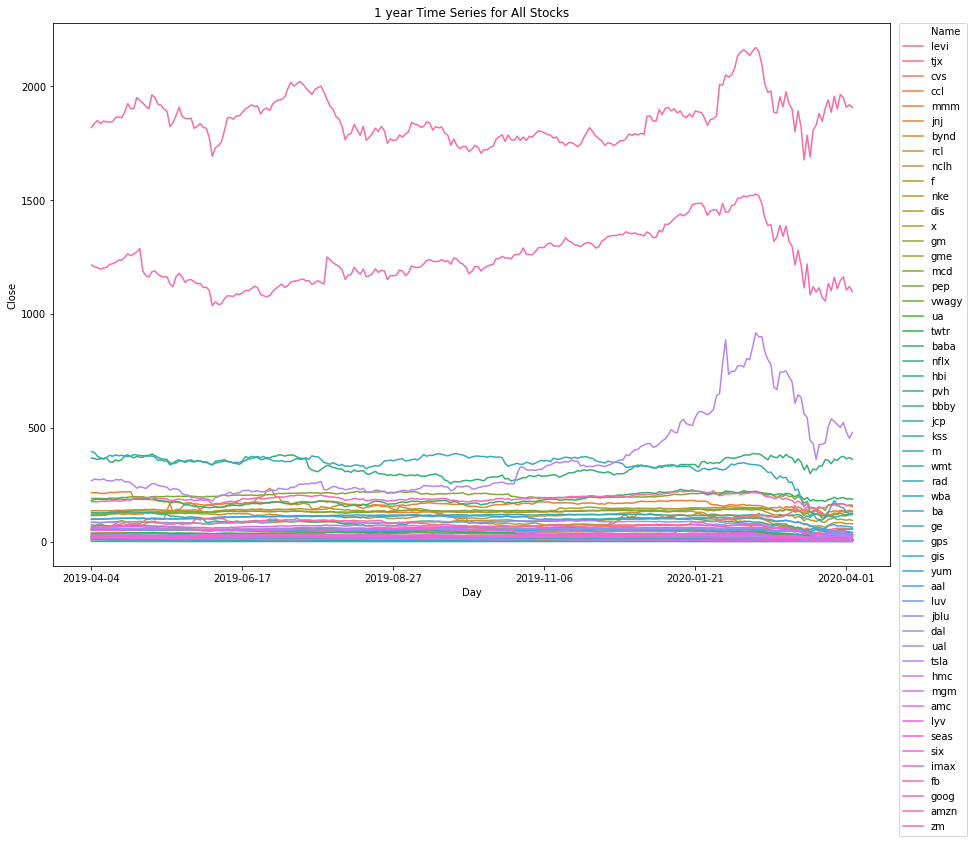

In [0]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='Day', y='Close', hue='Name', data=total_df)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(ticks=days, labels=dates_tickers)
plt.title("1 year Time Series for All Stocks")
plt.savefig('all_stocks_timeseries.png')
plt.show()

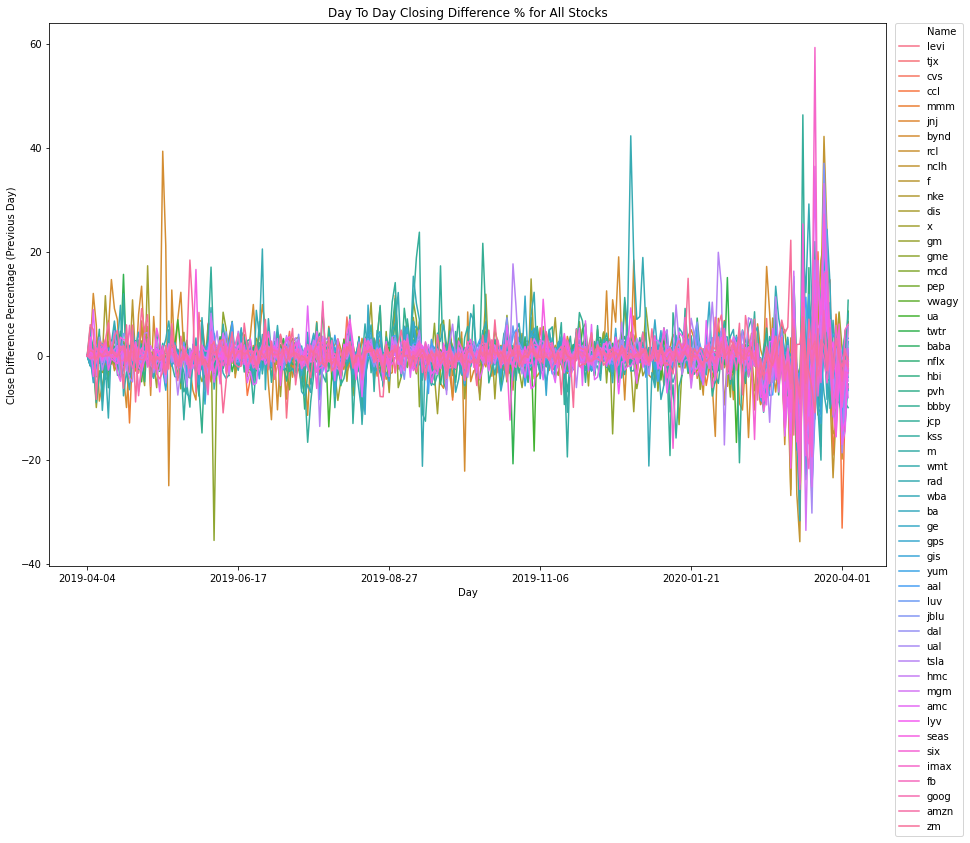

In [0]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='Day', y='Close Difference Percentage (Previous Day)', hue='Name', data=total_df)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(ticks=days, labels=dates_tickers)
plt.title("Day To Day Closing Difference % for All Stocks")
plt.savefig('all_stocks_difference_percent.png')
plt.show()

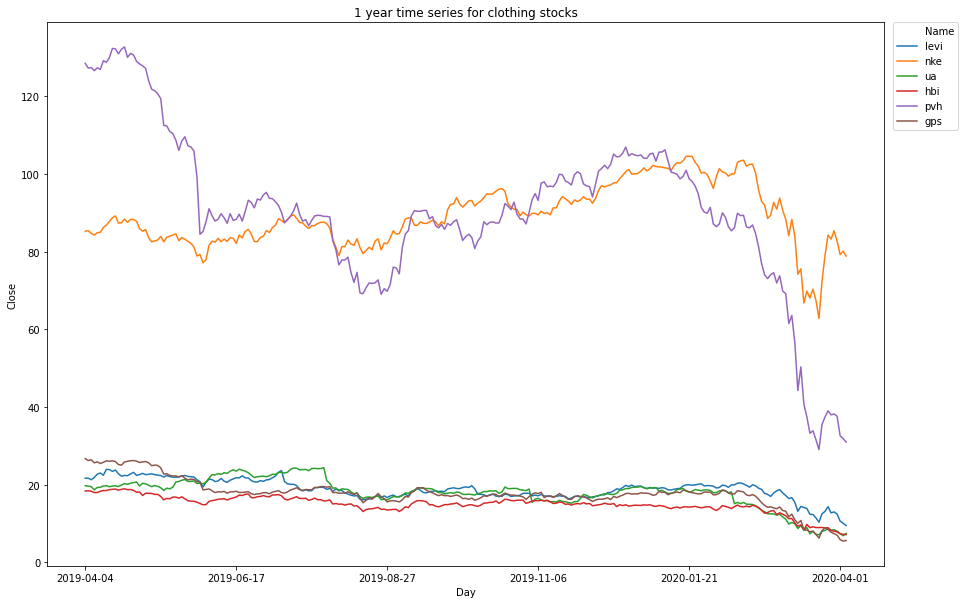

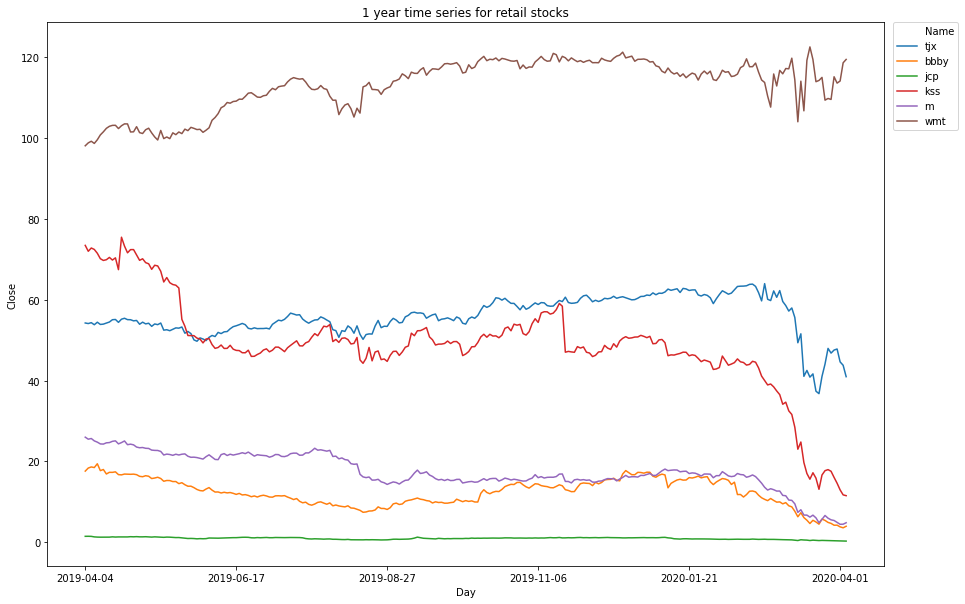

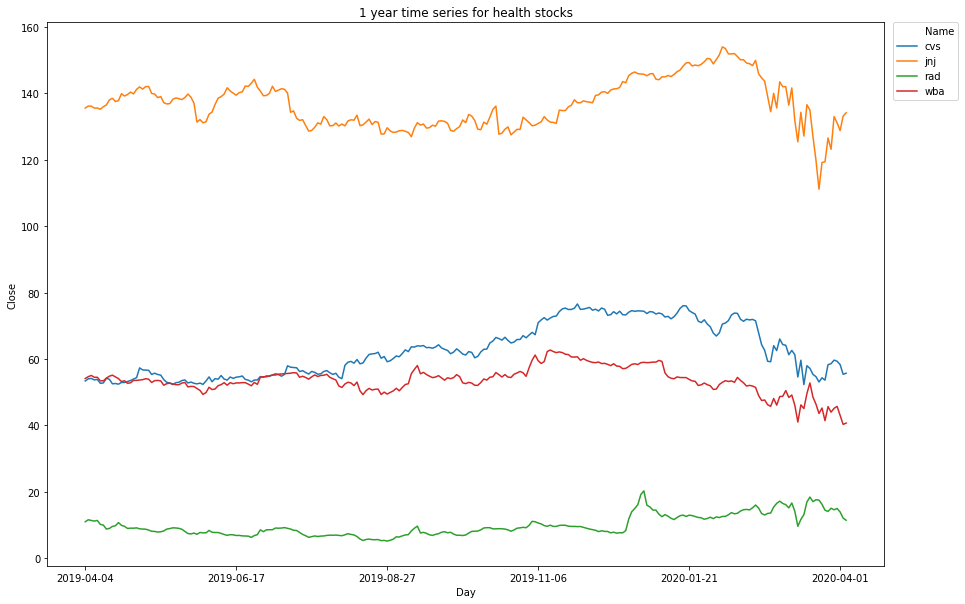

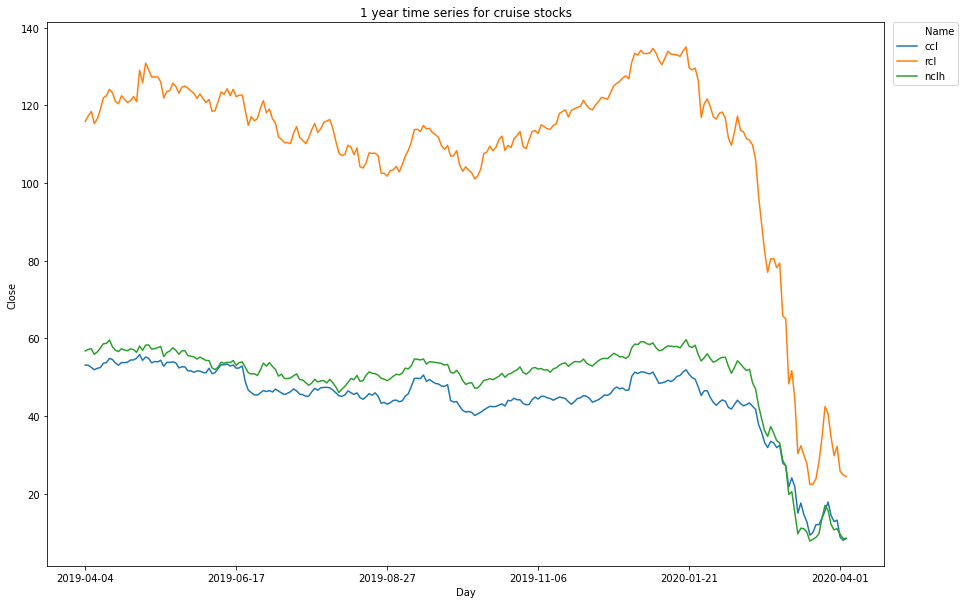

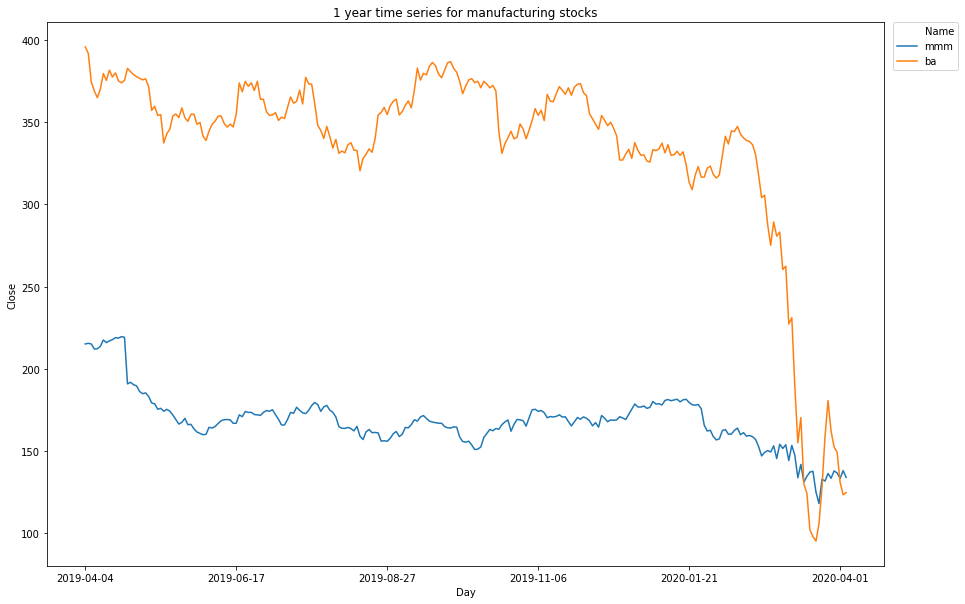

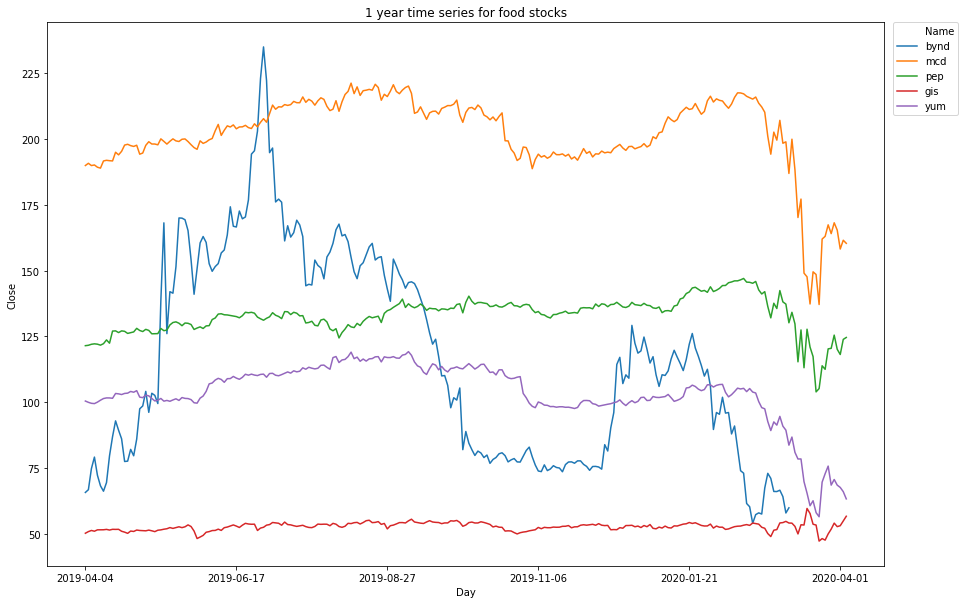

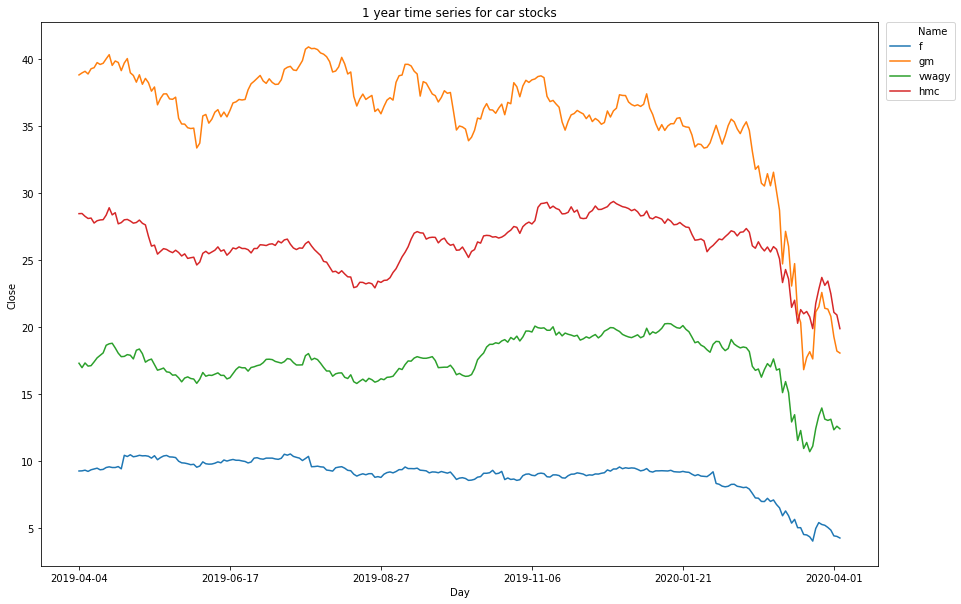

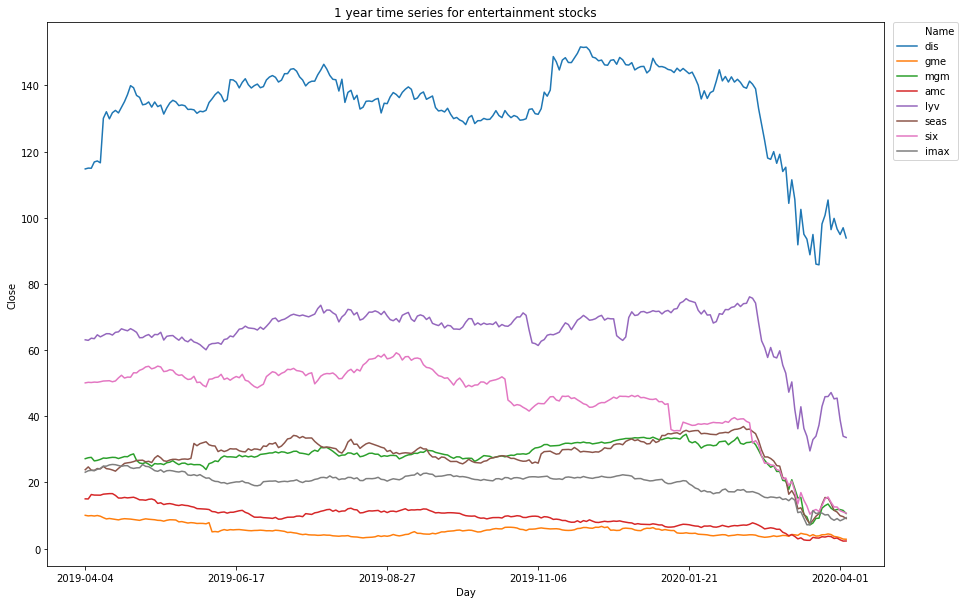

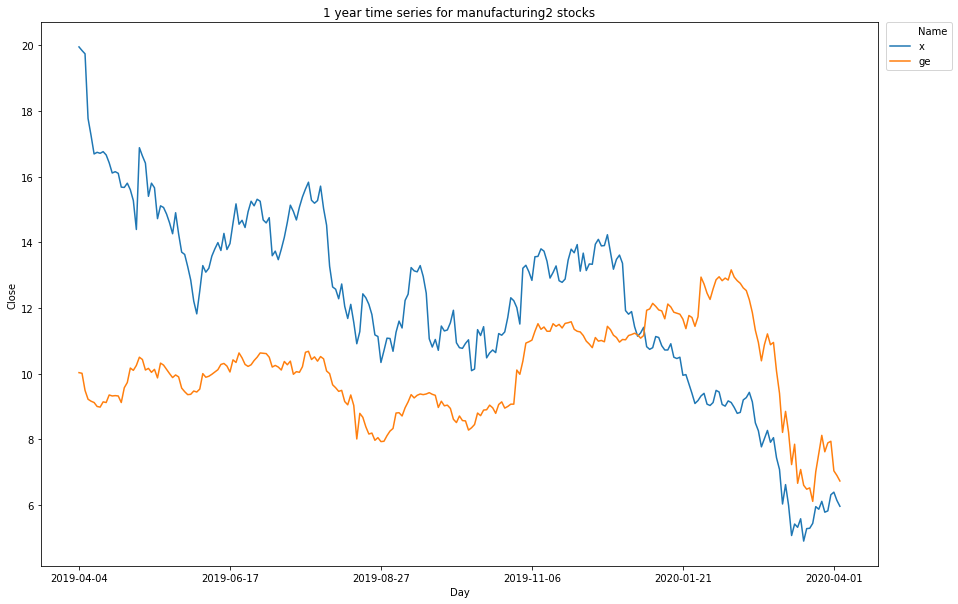

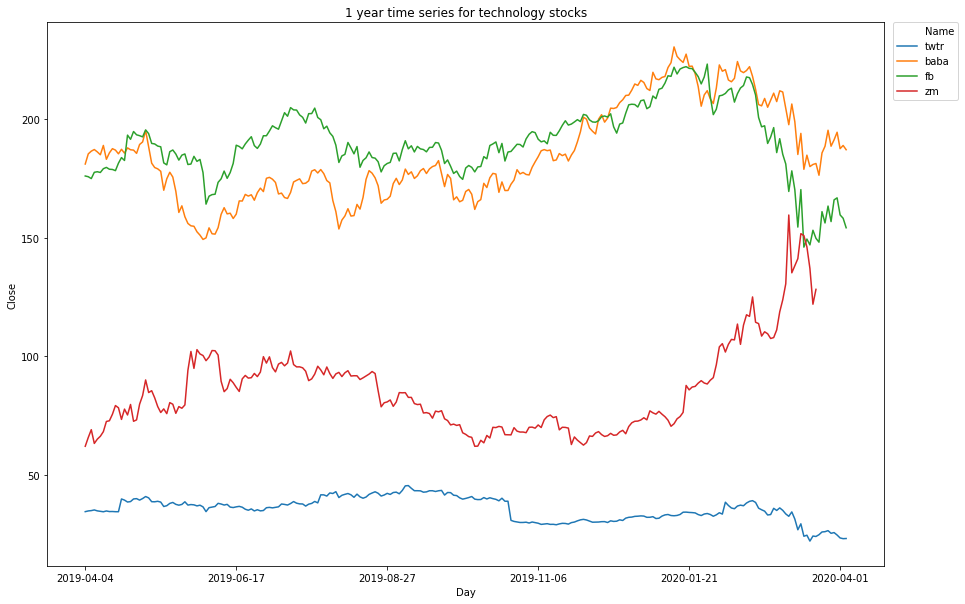

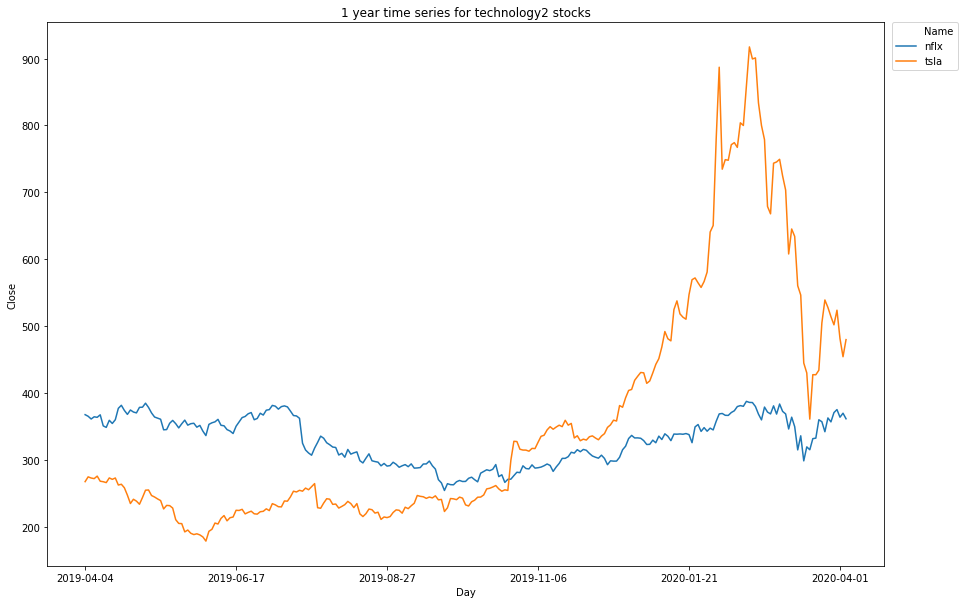

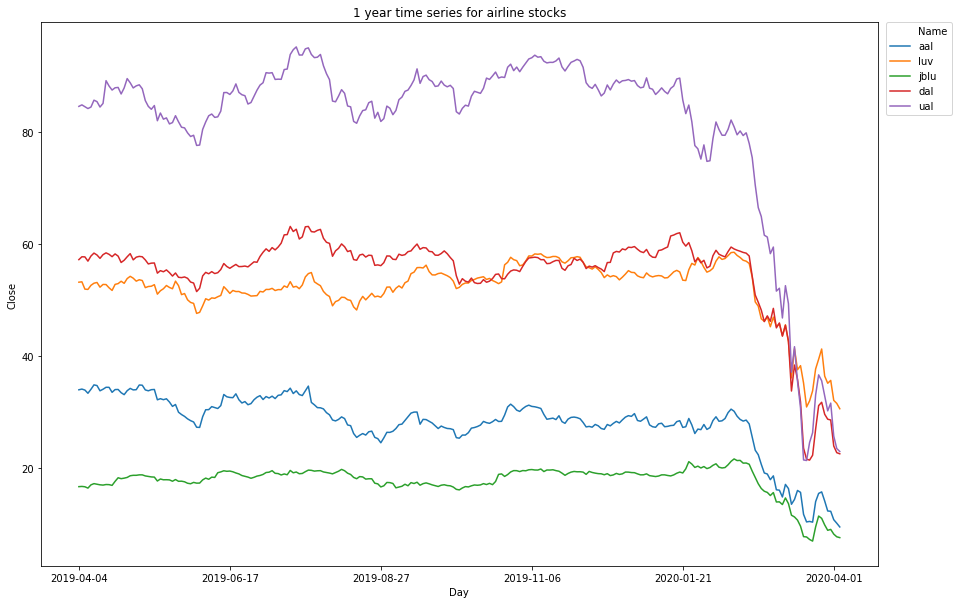

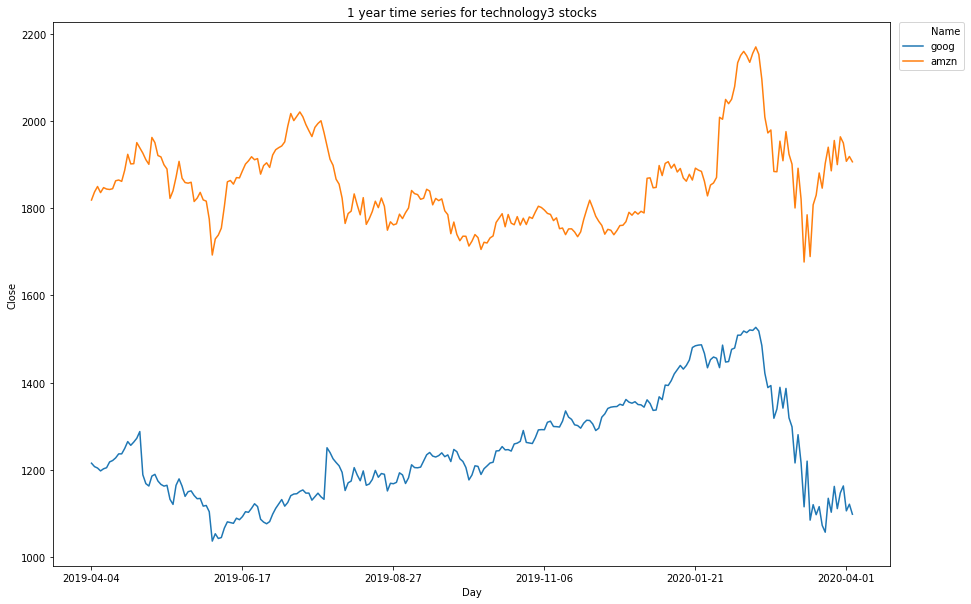

In [8]:
for industry in total_df.Industry.unique():
    plt.figure(figsize=(15, 10))
    sns.lineplot(x='Day', y='Close', hue='Name', data=total_df[total_df['Industry'] == industry])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(ticks=days, labels=dates_tickers)
    title = "1 year time series for " + industry + " stocks"
    plt.title(title)
    file_name = industry + "_stocks_timeseries.png"
    plt.savefig(file_name)
    plt.show()

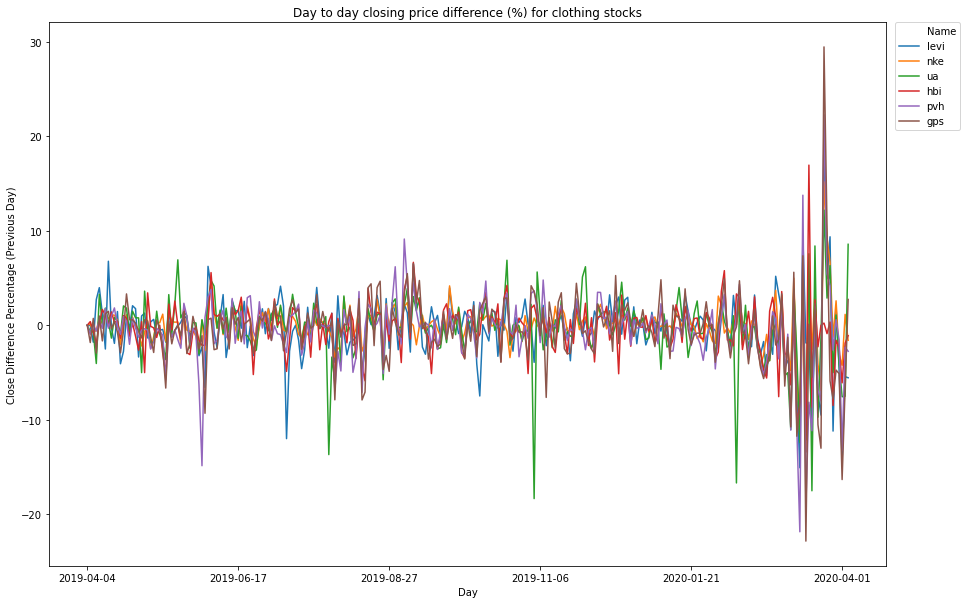

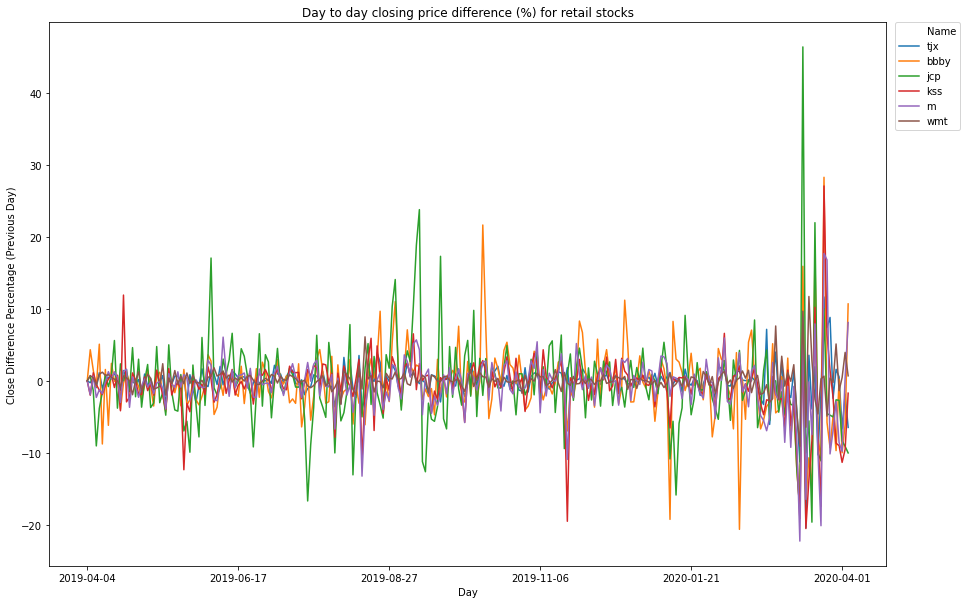

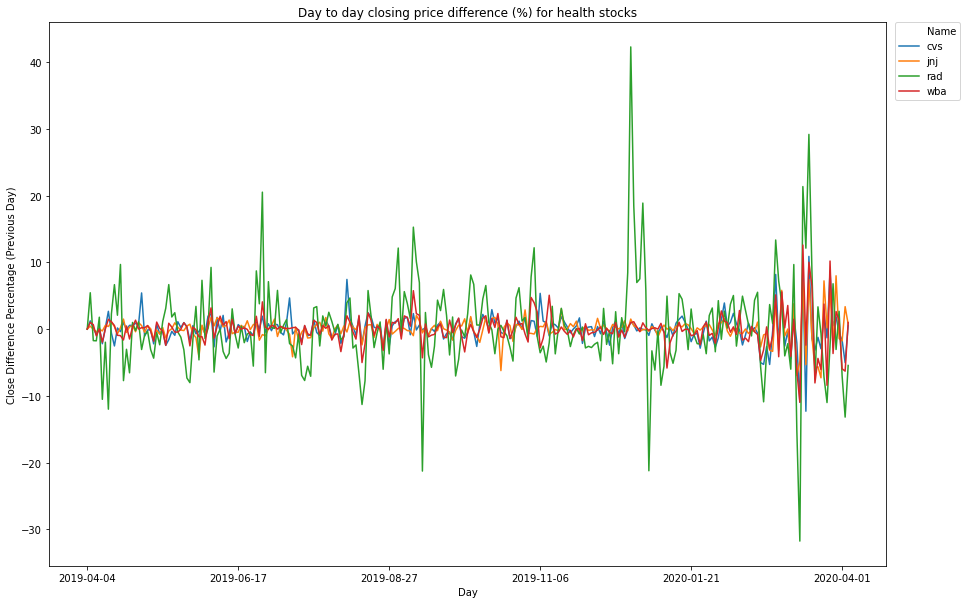

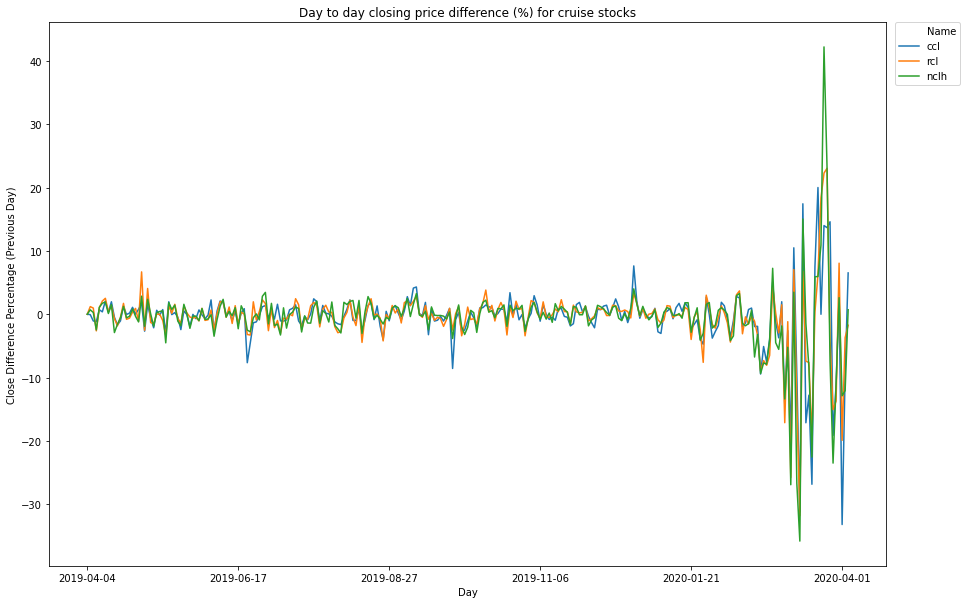

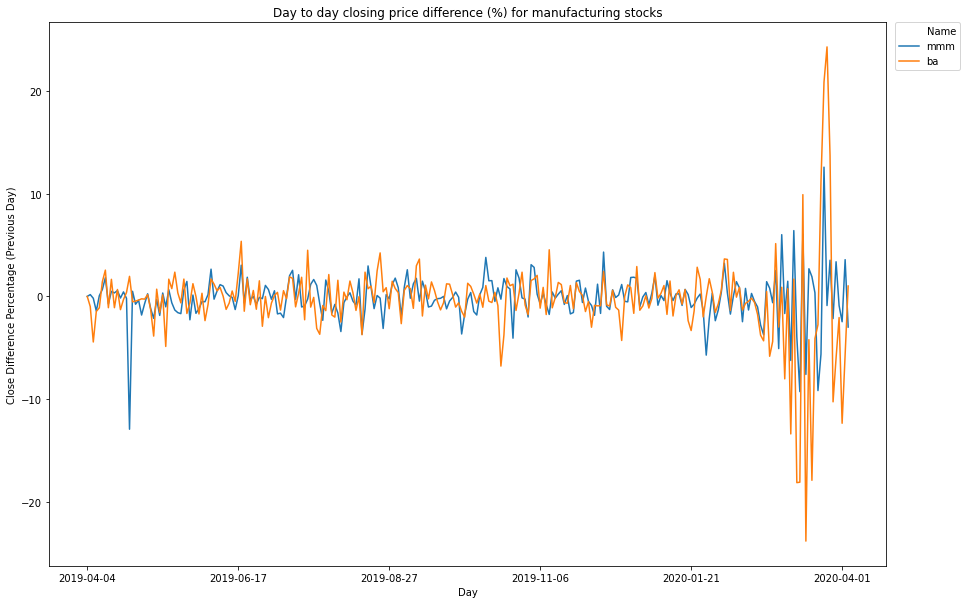

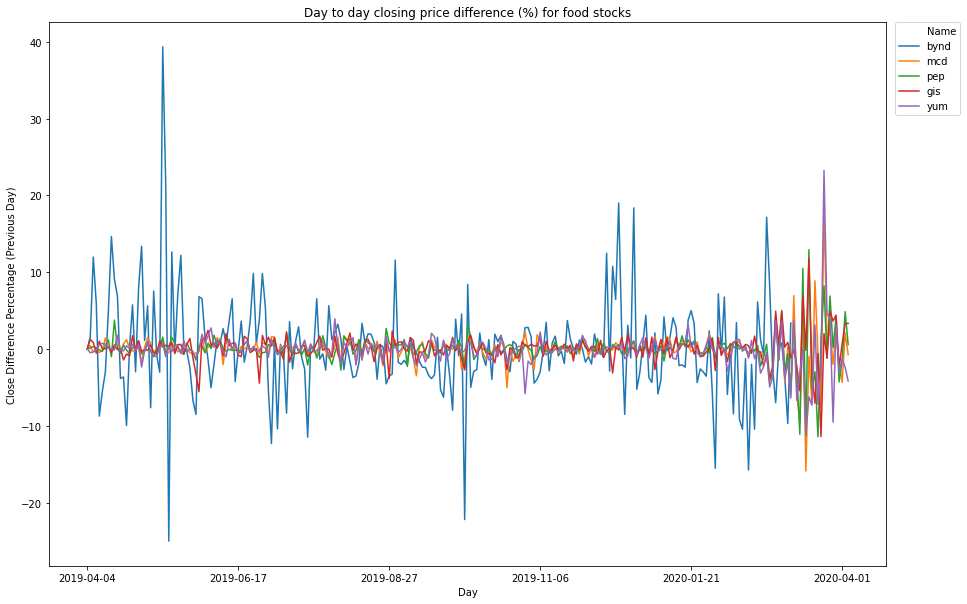

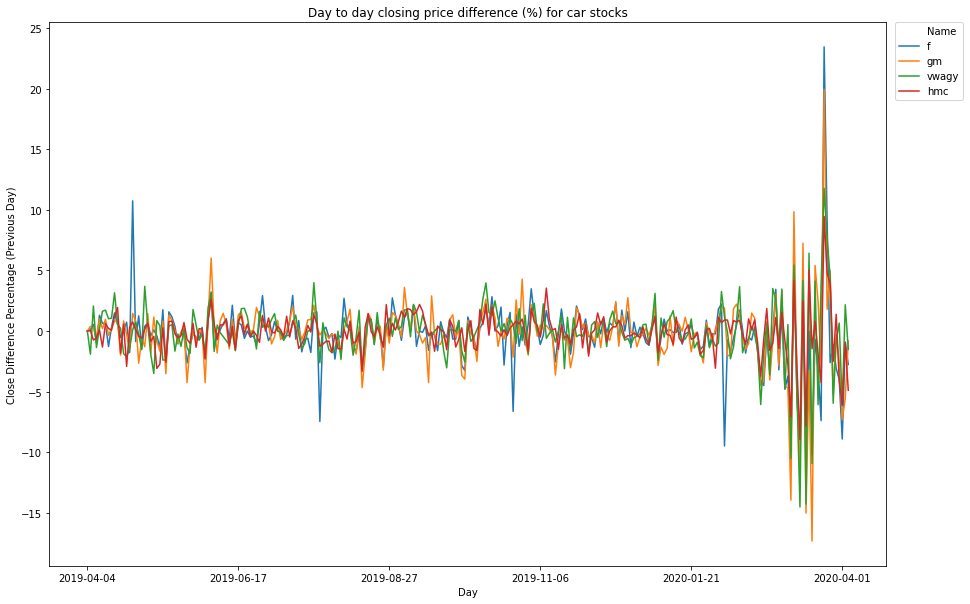

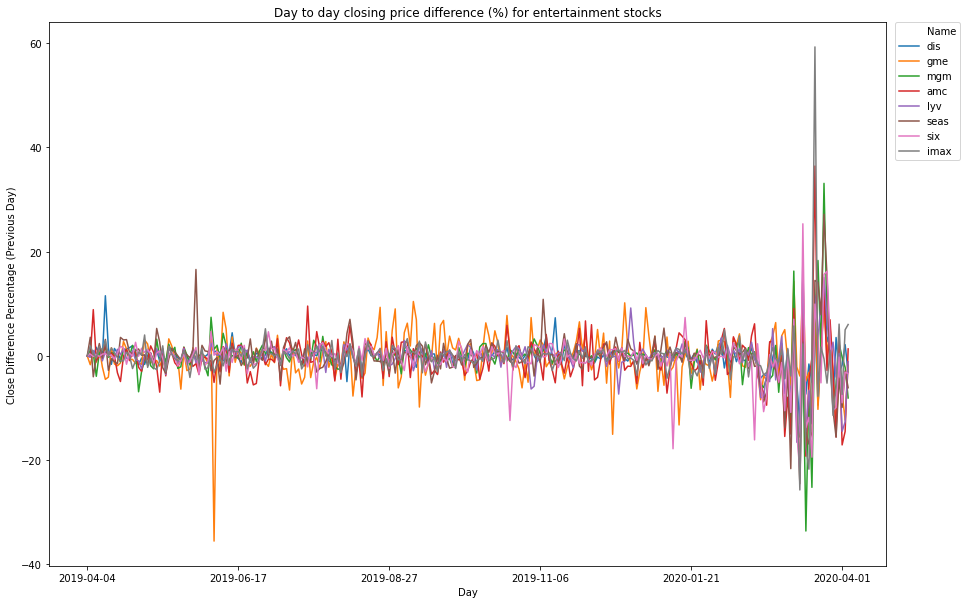

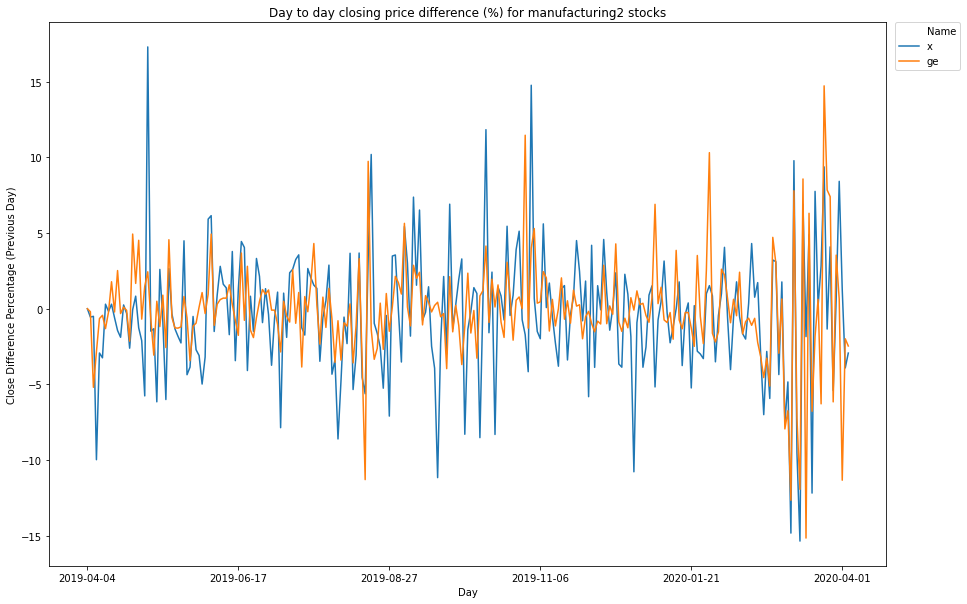

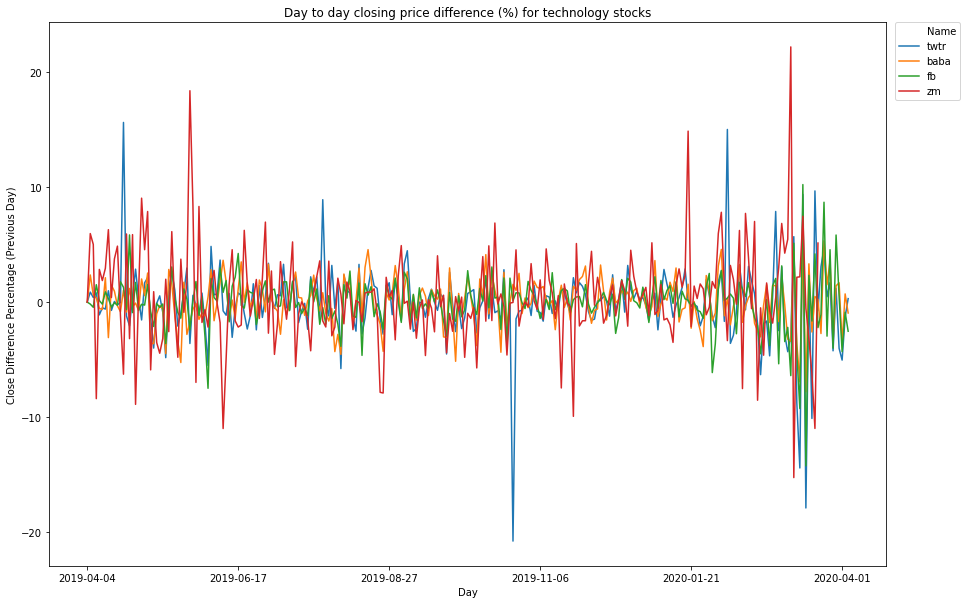

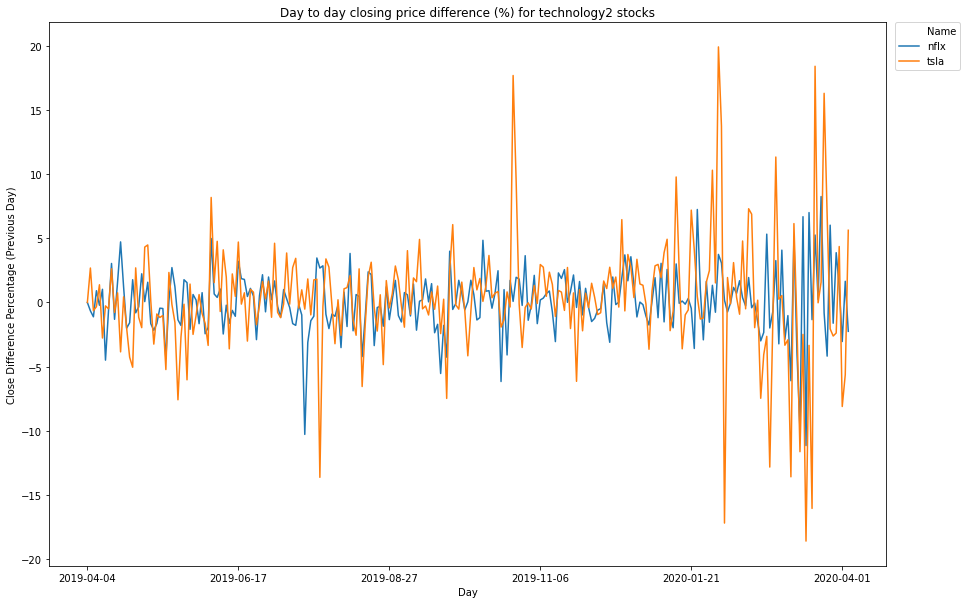

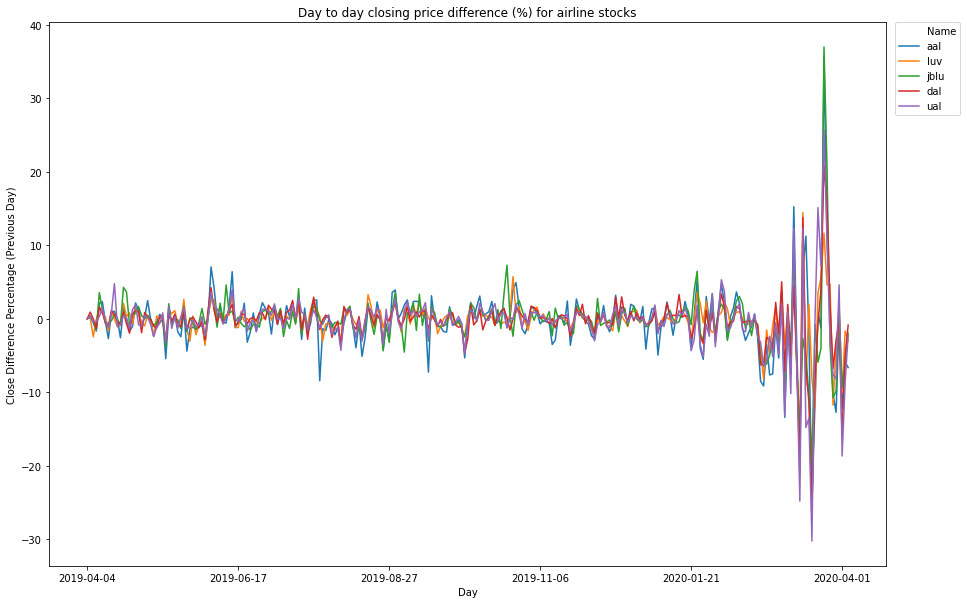

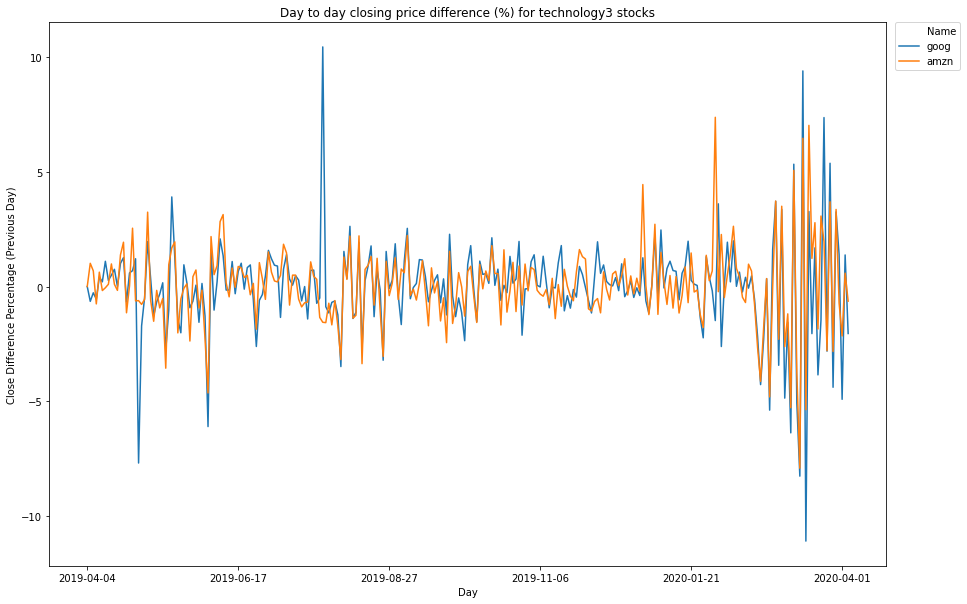

In [9]:
for industry in total_df.Industry.unique():
    plt.figure(figsize=(15, 10))
    sns.lineplot(x='Day', y='Close Difference Percentage (Previous Day)', hue='Name', data=total_df[total_df['Industry'] == industry])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(ticks=days, labels=dates_tickers)
    title = "Day to day closing price difference (%) for " + industry + " stocks"
    plt.title(title)
    file_name = industry + "_stocks_difference.png"
    plt.savefig(file_name)
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


ERROR! Session/line number was not unique in database. History logging moved to new session 60


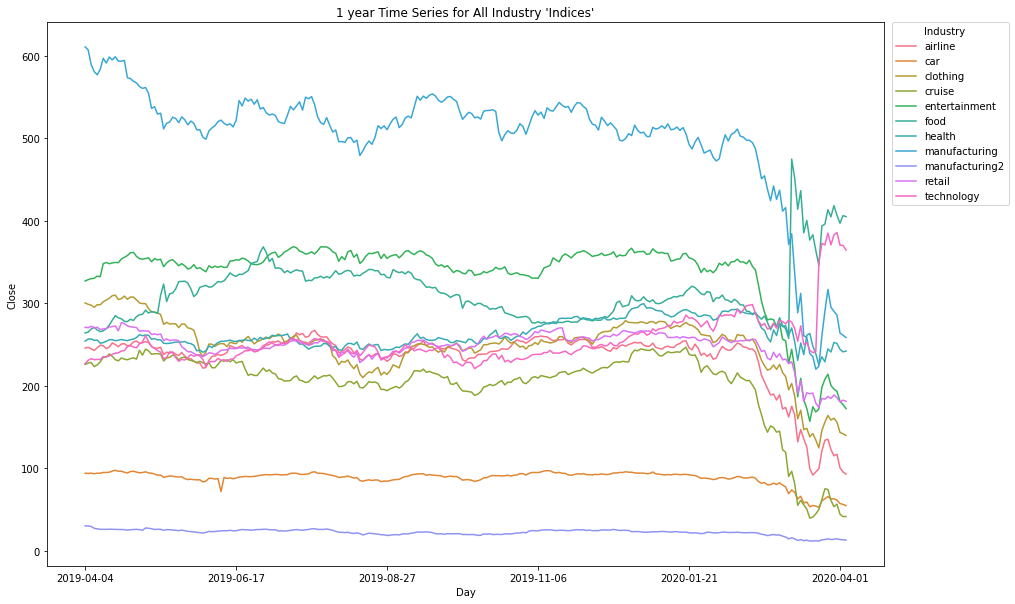

In [0]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='Day', y='Close', hue='Industry', data=((total_index_df[total_index_df['Industry'] != 'technology3'])[total_index_df['Industry'] != 'technology2']), ci=None)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(ticks=days, labels=dates_tickers)
plt.title("1 year Time Series for All Industry 'Indices'")
plt.savefig('all_industry_index_timeseries.png')
plt.show()

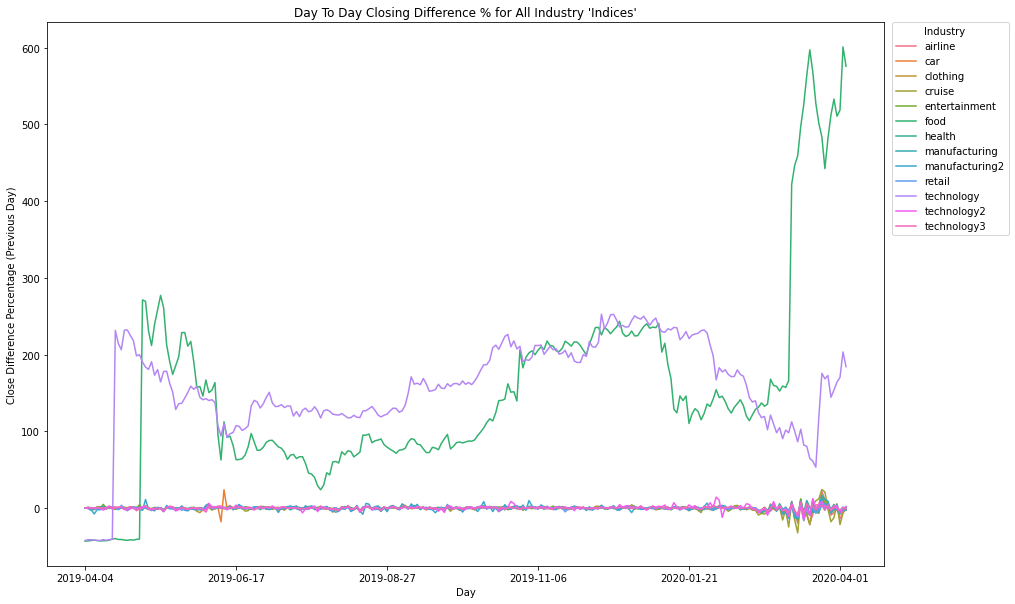

In [0]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='Day', y='Close Difference Percentage (Previous Day)', 
             hue='Industry', data=total_index_df, ci=None)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(ticks=days, labels=dates_tickers)
plt.title("Day To Day Closing Difference % for All Industry 'Indices'")
plt.savefig('all_industry_index_difference_percent.png')
plt.show()

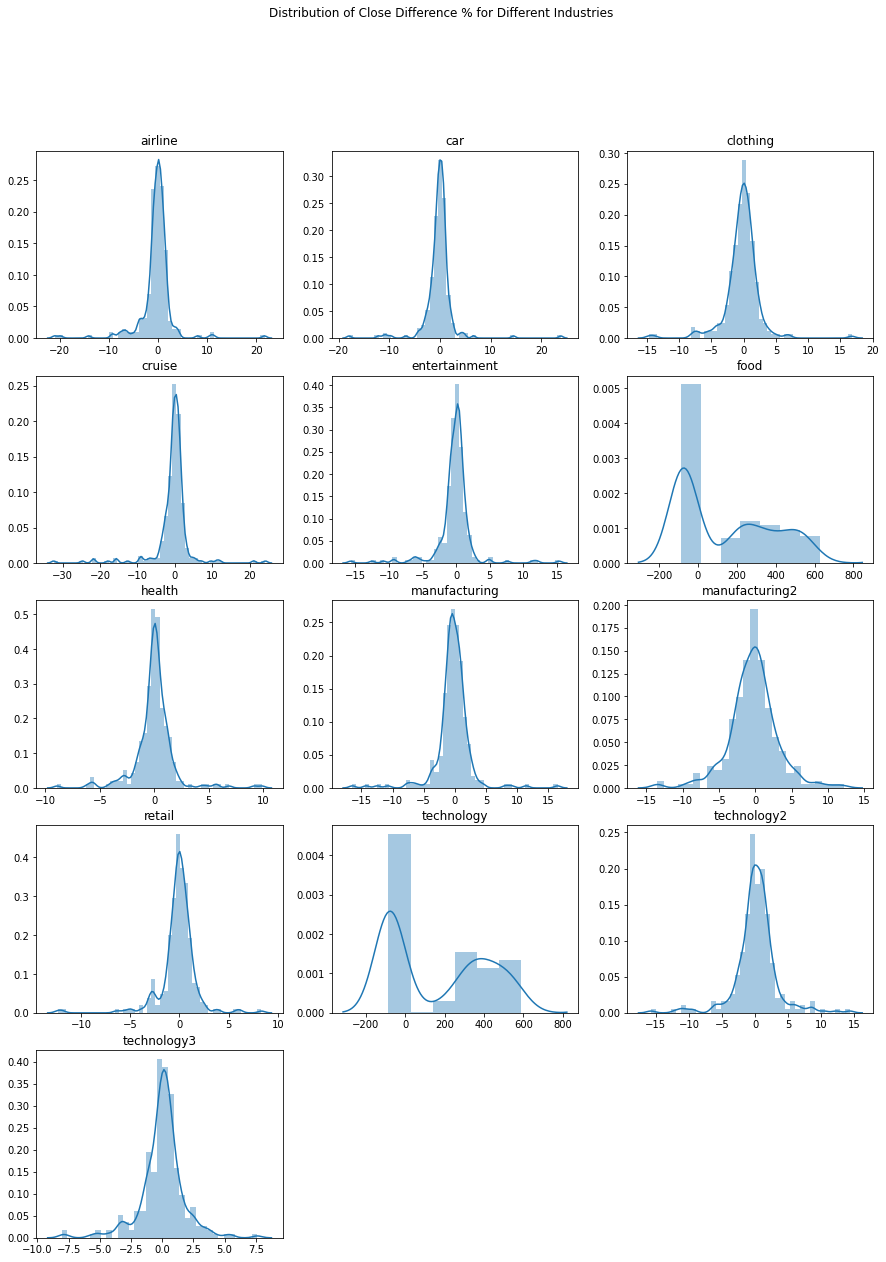

In [0]:
fig = plt.figure(figsize=(15, 20))
fig.suptitle('Distribution of Close Difference % for Different Industries')
i = 1
for industry in list(total_index_df['Industry'].unique()):
    ax = plt.subplot(5, 3, i)
    sns.distplot(total_index_df.loc[total_index_df['Industry'] == industry, 'Close Difference Percentage (Previous Day)'], ax=ax)
    ax.set_title(industry)
    ax.set_xlabel('')
    i += 1

plt.show()

[35.85144523635271, 9.003021756041559, 35.009308673243574, 46.72869966979621, 45.69424384009568, 190.43884730197536, 16.164270281402025, 72.32168783974652, 3.5439164437492803, 20.00409569256657, 164.7467982797127, 193.20225685162882, 173.97196171288988]
1006.6805535792009


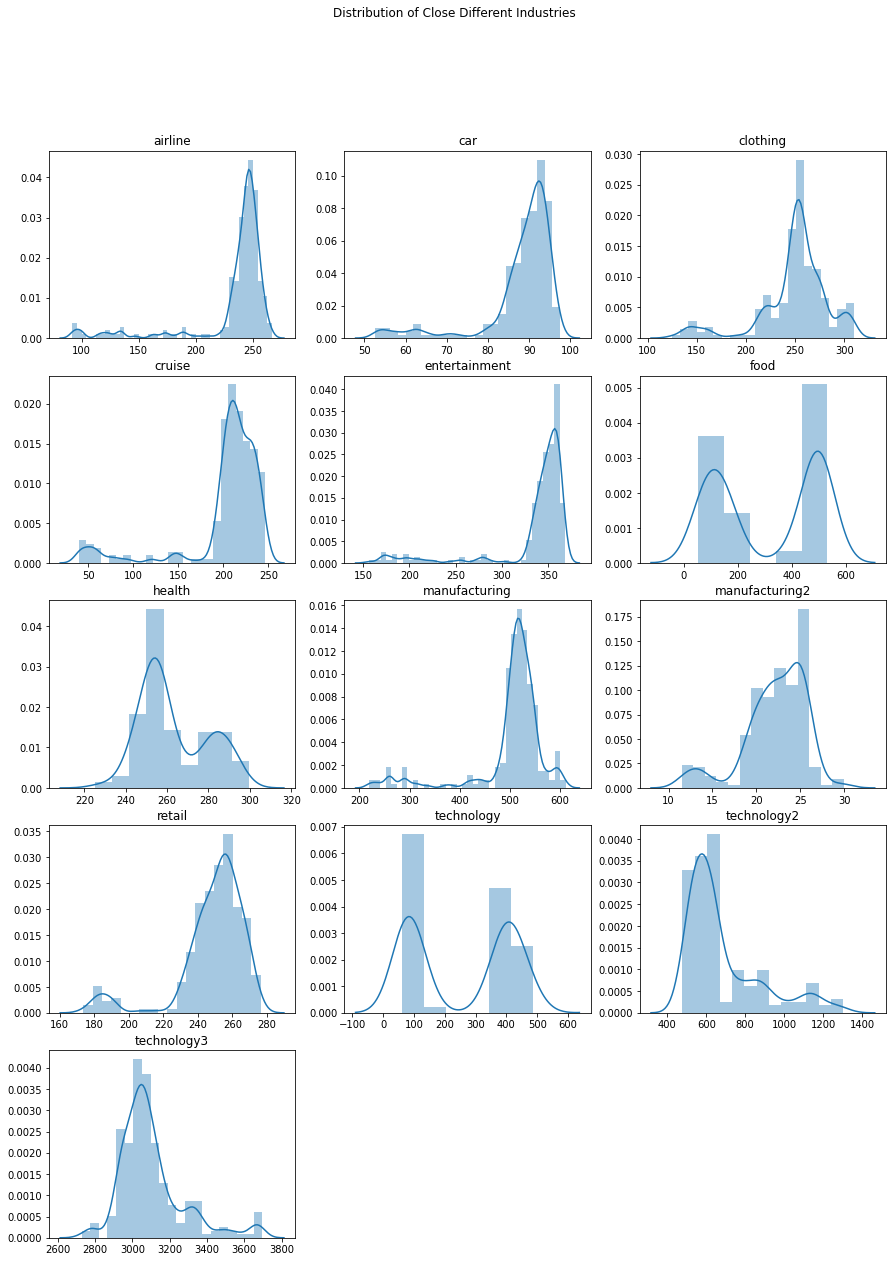

In [0]:
fig = plt.figure(figsize=(15, 20))
fig.suptitle('Distribution of Close Different Industries')
i = 1
stdev = []
for industry in list(total_index_df['Industry'].unique()):
    ax = plt.subplot(5, 3, i)
    sns.distplot(total_index_df.loc[total_index_df['Industry'] == industry, 'Close'], ax=ax)
    ax.set_title(industry)
    ax.set_xlabel('')
    i += 1
    stdev.append(np.std(total_index_df.loc[total_index_df['Industry'] == industry, 'Close']))

print(stdev)
print(np.sum(stdev))
plt.show()

In [0]:
combined_index_df = total_index_df.groupby(['Date']).sum().reset_index()

In [0]:
combined_index_df['Day'] = [i for i in range(combined_index_df.shape[0])]

In [0]:
combined_index_df.head()

Date  ...  Close Difference Percentage (Previous Day)
0  2019-04-04  ...                                    0.000000
1  2019-04-05  ...                                    3.123748
2  2019-04-08  ...                                   -4.882054
3  2019-04-09  ...                                  -14.552039
4  2019-04-10  ...                                    3.270717

[5 rows x 10 columns]

462.9657734838052


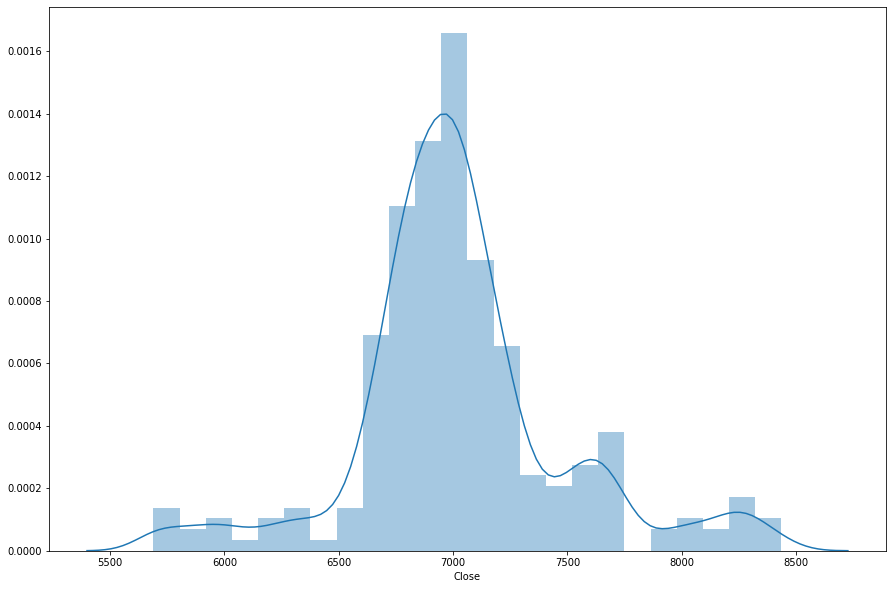

In [0]:
plt.figure(figsize=(15, 10))
sns.distplot(combined_index_df['Close'])
print(np.std(combined_index_df['Close']))
plt.show()